In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Load Dataset
dataset = pd.read_csv('./bodyfatanalysis.csv')
dataset.head()

,Triceps,Thigh,Midarm,Bodyfat
0,19.5,43.1,29.1,11.9
1,24.7,49.8,28.2,22.8
2,30.7,51.9,37.0,18.7
3,29.8,54.3,31.1,20.1
4,19.1,42.2,30.9,12.9


In [3]:
#Create x (we ignore the y variable)
x = dataset.drop('Bodyfat', axis=1).to_numpy()

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_transformed=sc.fit_transform(x)

C:\Users\100274743\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


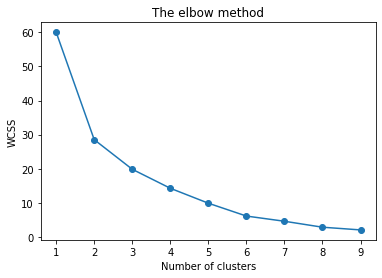

In [4]:
#Determine optimum number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
    
#Plot Elbow Method
plt.plot(range(1, 10), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()  

For n_clusters= 2, The Silhouette Coefficient is 0.4296958633386091
For n_clusters= 3, The Silhouette Coefficient is 0.32397711365779935
For n_clusters= 4, The Silhouette Coefficient is 0.3162391541452452
For n_clusters= 5, The Silhouette Coefficient is 0.3853337926093284
For n_clusters= 6, The Silhouette Coefficient is 0.3859104531470531
For n_clusters= 7, The Silhouette Coefficient is 0.393753771316145
For n_clusters= 8, The Silhouette Coefficient is 0.40426485982852567
For n_clusters= 9, The Silhouette Coefficient is 0.4030579909596059


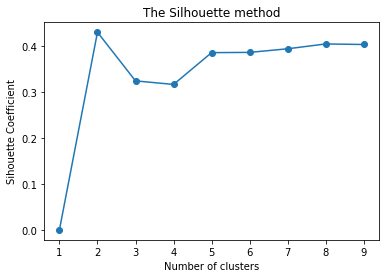

In [5]:
#Create Silhouette Coefficients
scores= [0]
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       scores.append(sil_coeff) 
       print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

#Plot Silhouette
plt.plot(range(1,10), scores, marker='o')
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Coefficient') 
plt.show()        

In [6]:
#Create KMeans with 2 Clusters

#Apply KMeans clustering
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Add Prediction column to dataset
dataset2= dataset.drop('Bodyfat', axis=1)
dataset2['New Cluster']=kmeans.labels_
dataset2['New Cluster'] = dataset2['New Cluster'].map({0:'Cluster 1', 1:'Cluster 2'}) 
dataset2.head()

,Triceps,Thigh,Midarm,New Cluster
0,19.5,43.1,29.1,Cluster 2
1,24.7,49.8,28.2,Cluster 1
2,30.7,51.9,37.0,Cluster 1
3,29.8,54.3,31.1,Cluster 1
4,19.1,42.2,30.9,Cluster 2


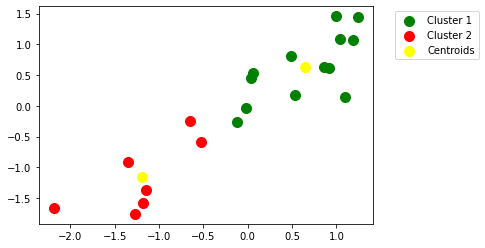

In [7]:
#Plot of 2 Clusters
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)